# Data prepration

In [12]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi

In [13]:
# Generate n data with var1 and n data with var2
def var_data(n, var1, var2, rand=1234):
    v1 = var1 * np.ones(n)
    v2 = var2 * np.ones(n)
        
    x1, y1 = np.transpose(np.array([np.random.normal(0, v1, size=n), v2])), np.zeros(n)
    x2, y2 = np.transpose(np.array([np.random.normal(0, v2, size=n), v2])), np.ones(n)
    x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = rand)
    
    return x_train, x_test, y_train, y_test


n = 100000
var_min = 1
var_max = 7

v1 = np.ones(n)
v2 = np.random.uniform(var_min, var_max, n)
x1, y1 = np.transpose(np.array([np.random.normal(0, v1, size=n), v2])), np.zeros(n)
x2, y2 = np.transpose(np.array([np.random.normal(0, v2, size=n), v2])), np.ones(n)
x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

# Training Interpolated Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]);

loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

EPOCHS=10
model.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
);

2022-06-01 16:18:16.008334: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:18:16.008375: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:18:16.008518: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/10
 28/160 [====>.........................] - ETA: 0s - loss: 0.6028 - accuracy: 0.6481

2022-06-01 16:18:16.461547: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:18:16.461578: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:18:16.481835: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-06-01 16:18:16.482721: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-01 16:18:16.493072: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-161816/train/plugins/profile/2022_06_01_16_18_16

2022-06-01 16:18:16.497875: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220601-161816/train/plugins/profile/2022_06_01_16_18_16/jupyter-matan.trace.json.gz
2022-06-01 16:18:16.499783: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-161

160/160 [==============================] - 1s 5ms/step - loss: 0.5042 - accuracy: 0.7363
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4737 - accuracy: 0.7600
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4708 - accuracy: 0.7605
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7615
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4679 - accuracy: 0.7609
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.7612
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4667 - accuracy: 0.7621
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.7617
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.7618
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.7618


In [7]:
model.evaluate(x_test,  y_test, verbose=2)

1250/1250 - 1s - loss: 0.4686 - accuracy: 0.7586


[0.46858876943588257, 0.7585999965667725]

In [4]:
# Model Classification Predictions
predictions = np.round(model(x_test).numpy())

# Looking at original data and predictions
print(x_test[:10, 0])
print(x_test[:10, 1])
print(predictions[:10, 0])
print(y_test[:10])

[ 0.485506    0.5799745  -1.70278627  0.70975042 -0.94975543  4.19392323
  4.02170699 -6.05098605  0.55048698 -1.42842961]
[2.86044888 4.31044476 1.86103768 2.49706952 1.02460179 5.97119473
 6.66712029 3.56748712 1.43267955 5.67513173]
[0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
[1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]


In [15]:
# Separate Data into bins based on variance

epsilon = 0.1
bins = int((var_max - var_min) / (2 * epsilon))
var_list = np.arange(var_min + epsilon, var_max + epsilon, 2 * epsilon)

test_binned, x_test_bin, y_test_bin = [], [], []
for i in range(bins):
    c = var_list[i]
    test_binned.append(np.array([(x, v, y) for (x, v, y) in zip(x_test[:, 0], x_test[:, 1], y_test) if np.abs(v - c) < epsilon]))
    x_test_bin.append(np.array(test_binned[i][:, 0:2]))
    y_test_bin.append(np.array(test_binned[i][:, 2]))
#     print(test_binned[i].shape)



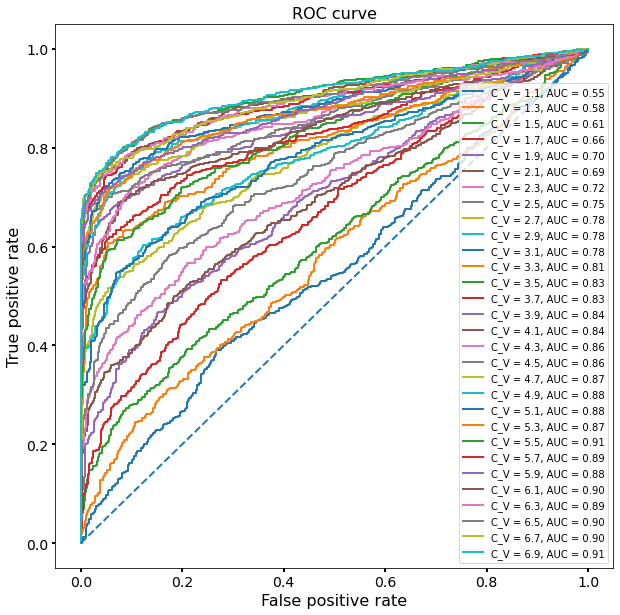

In [16]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14

for i in range(bins):
    x_test = x_test_bin[i]
    y_test = y_test_bin[i]
    predictions = model(x_test).numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label='C_V = %.1f, AUC = %.2f' % (var_list[i], auc))

ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('ROC curve', fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

# Training on just one Gaussian

In [17]:
x_train, x_test, y_train, y_test = var_data(n, 1, 7)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]);

loss_fn = tf.keras.losses.BinaryCrossentropy()
model2.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

EPOCHS=10
model2.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
);

2022-06-01 16:18:33.153809: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:18:33.153847: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:18:33.153892: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/10
 27/160 [====>.........................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7347

2022-06-01 16:18:33.616735: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:18:33.616772: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:18:33.637513: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-06-01 16:18:33.638454: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-01 16:18:33.650104: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-161833/train/plugins/profile/2022_06_01_16_18_33

2022-06-01 16:18:33.655677: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220601-161833/train/plugins/profile/2022_06_01_16_18_33/jupyter-matan.trace.json.gz
2022-06-01 16:18:33.657461: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-161

160/160 [==============================] - 1s 5ms/step - loss: 0.3676 - accuracy: 0.8407
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3249 - accuracy: 0.8651
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3241 - accuracy: 0.8654
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8653
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3232 - accuracy: 0.8649
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8653
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8653
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3228 - accuracy: 0.8656
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8657
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3228 - accuracy: 0.8656


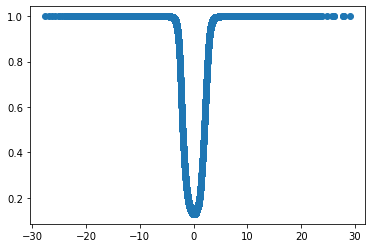

In [26]:
plt.scatter(x_test[:,0], predictions)

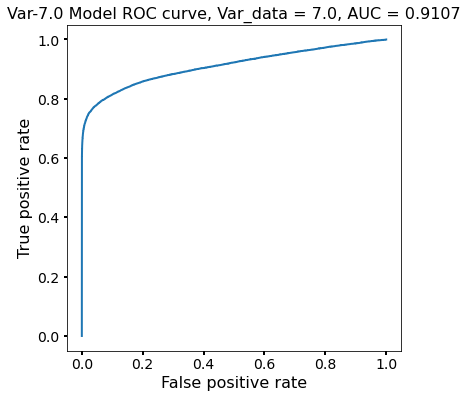

In [18]:
predictions = model2(x_test).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (7, auc))
ax1.set_xlabel("Score")
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Var-7.0 Model ROC curve, Var_data = %.1f, AUC = %.4f' % (7, auc), fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

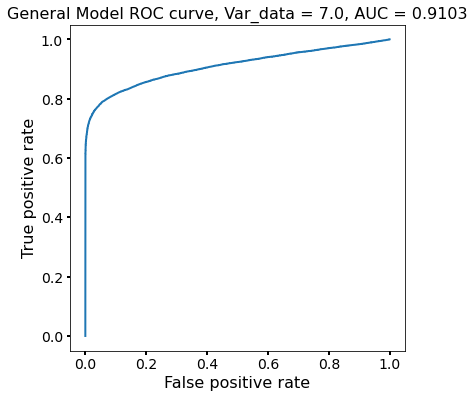

In [13]:
predictions = model(x_test).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (7, auc))
ax1.set_xlabel("Score")
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Interpolated Model ROC curve, Var_data = %.1f, AUC = %.4f' % (7, auc), fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

# Now let's try these both on a Gaussian with some random variance

In [7]:
v0 = 10
_, x_test0, _, y_test0 = var_data(n, 1, v0)

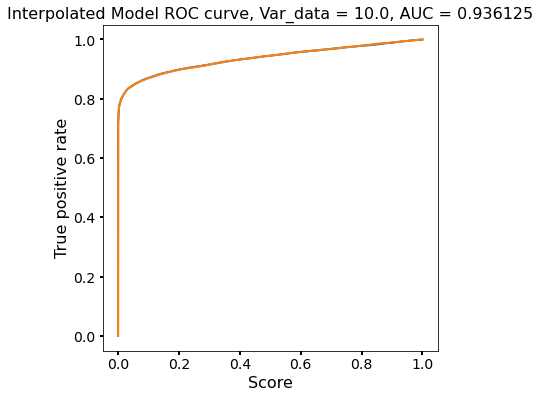

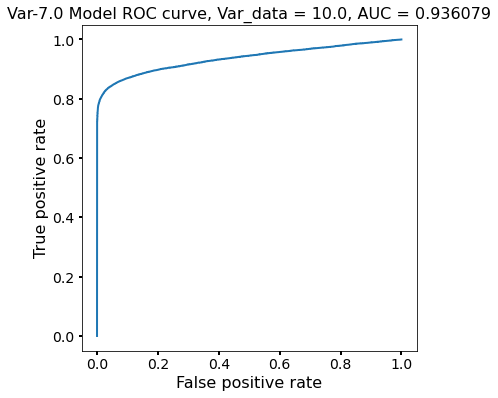

In [12]:

predictions = model(x_test0).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test0, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (7, auc))
ax1.set_xlabel("Score")
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Interpolated Model ROC curve, Var_data = %.1f, AUC = %.6f' % (v0, auc), fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

predictions = model2(x_test0).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test0, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.6f' % (7, auc))
ax1.set_xlabel("Score")
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Var-7.0 Model ROC curve, Var_data = %.1f, AUC = %.6f' % (v0, auc), fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)